### Here we ayalyze the workload imbalance of long running batch jobs

In [1]:
import numpy as np
import pandas as pd 

In [3]:
ce = pd.read_csv("D:/Files/2019 Spring/High P Com/Project/trace_201708/trace_201708/container_event.csv")

In [5]:
ce.head()

,ts,event,instance_id,machine_id,plan_cpu,plan_mem,plan_disk,cpuset
0,0,Create,10000,934,4,0.042409,0.034085,40|41|42|43
1,0,Create,1000,1295,8,0.084819,0.056809,56|57|58|59|60|61|62|63
2,0,Create,10001,668,8,0.084819,0.056809,24|25|26|27|28|29|30|31
3,0,Create,10002,1217,8,0.084819,0.056809,4|5|6|7|8|9|10|11
4,0,Create,10003,1019,4,0.042409,0.034085,36|37|38|39


In [7]:
ce_instance_id = np.sort(ce.instance_id)
ce_instance_id

array([    2,     3,     4, ..., 11273, 11274, 11275], dtype=int64)

In [9]:
ce_machine_id = np.sort(ce.machine_id)
ce_machine_id

array([   1,    1,    1, ..., 1313, 1313, 1313], dtype=int64)

In [11]:
ce_plan_cpu = np.sort(ce.plan_cpu)
ce_plan_cpu

array([ 1,  1,  1, ..., 16, 16, 16], dtype=int64)

In [21]:
ce_plan_mem = np.sort(ce.plan_mem)
ce_plan_mem

array([0.00265058, 0.00265058, 0.00265058, ..., 1.00000241, 1.00000241,
       1.00001027])

In [14]:
reserve_cpu_num = {}
for m_id in ce_machine_id:
    reserve_cpu_num[m_id] = sum(ce[ce.machine_id == m_id].plan_cpu)

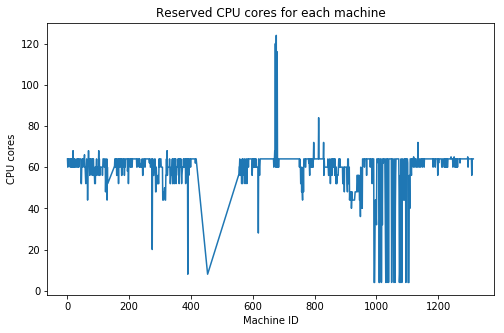

In [20]:
import matplotlib.pyplot as plt
import os.path
plt.figure(figsize=[8,5])

#plot each machine reserved CPU number
lists = sorted(reserve_cpu_num.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu_number = [z for z in y]
machine_id = [z for z in x]
plt.title("Reserved CPU cores for each machine")
plt.ylabel("CPU cores")
plt.xlabel("Machine ID")
plt.plot(machine_id, cpu_number, label="cpu number")
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'reserve_CPU_cores.png')
plt.savefig(filename, dpi=300)
plt.show()

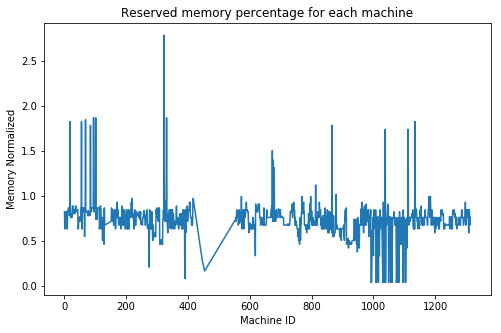

In [24]:
reserve_mem = {}
for m_id in ce_machine_id:
    reserve_mem[m_id] = sum(ce[ce.machine_id == m_id].plan_mem)
    
import matplotlib.pyplot as plt
import os.path
plt.figure(figsize=[8,5])

#plot each machine reserved memory percentage 
lists = sorted(reserve_mem.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
mem_precent = [z for z in y]
machine_id = [z for z in x]
plt.title("Reserved memory percentage for each machine")
plt.ylabel("Memory Normalized")
plt.xlabel("Machine ID")
plt.plot(machine_id, mem_precent, label="memory percentage")
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'reserve_memory.png')
plt.savefig(filename, dpi=300)
plt.show()

#### From the above two plot figures, we can find reserved CPU cores and memory are vary in different machines. Some machines have been reserved over burdern recourse but some are under burdern